Based on the Toronto airbnb data from Inside Airbnb, I am going to explore the data and answer few questions:
- What do we learn about different hosts and areas?  
- Which neighbourhood are the most popular and why? 
- Which are the neighborhoods with the most expensive listings?
- How many Airbnb listings does each neighborhood posses?
- Which hosts are the top hosts i.e. has the most listing? ?
- Explore and analyze the data set to identify short-term rentals and licensing.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [3]:
df = pd.read_csv('listing_toronto.csv')
print('The shape of the dataset: ',df.shape)

The shape of the dataset:  (16035, 18)


In [4]:
df.head(3)

,id,listing_url,host_name,neighbourhood,neighbourhood_cleansed,property_type,room_type,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,license,calculated_host_listings_count
0,27640141,https://www.airbnb.com/rooms/27640141,Liora,Toronto,Dovercourt-Wallace Emerson-Junction,Entire guest suite,Entire home/apt,90.0,28,1125,t,0,25,55,145,47,Unlicensed,2
1,27826009,https://www.airbnb.com/rooms/27826009,Brianne,Toronto,Waterfront Communities-The Island,Entire condo,Entire home/apt,130.0,28,1125,t,0,0,0,0,2,Unlicensed,1
2,27647117,https://www.airbnb.com/rooms/27647117,Alexandra,Toronto,Playter Estates-Danforth,Entire rental unit,Entire home/apt,45.0,28,30,t,0,0,0,0,4,Unlicensed,1


In [5]:
df.columns

Index(['id', 'listing_url', 'host_name', 'neighbourhood',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'license',
       'calculated_host_listings_count'],
      dtype='object')

In [6]:
df.describe()

,id,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,calculated_host_listings_count
count,1.603500e+04,16035.000000,16035.000000,16035.000000,16035.000000,16035.000000,16035.000000,16035.000000,16035.000000,16035.000000
mean,1.415557e+17,205.232679,25.197630,626.709323,7.018584,19.359963,34.099470,139.112317,27.801497,5.448145
std,2.677914e+17,349.268699,37.165404,487.865924,9.755398,21.193879,33.261237,134.301950,55.838458,13.894427
min,1.419000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.067456e+07,80.000000,3.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.832875e+07,130.000000,28.000000,365.000000,1.000000,9.000000,30.000000,90.000000,6.000000,1.000000
75%,5.336650e+07,226.000000,28.000000,1125.000000,11.000000,37.000000,66.000000,276.000000,28.000000,4.000000
max,7.102781e+17,13164.000000,1125.000000,10001.000000,30.000000,60.000000,90.000000,365.000000,828.000000,129.000000


In [7]:
# Checking for any null values in the dataset
df.isnull().sum()

id                                0
listing_url                       0
host_name                         0
neighbourhood                     0
neighbourhood_cleansed            0
property_type                     0
room_type                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
license                           0
calculated_host_listings_count    0
dtype: int64

In [8]:
# Renaming the 'calculated_host_listings_count column' as 'host_listings_count'
df.rename(columns = {'calculated_host_listings_count':'host_listings_count'}, inplace = True)

## Room types

In [9]:
df1 = pd.DataFrame(data = df['room_type'].value_counts())
df1.columns = ['total_count']
df1['percentage (%)'] = round(df['room_type'].value_counts(normalize= True) * 100, 1)
df1

,total_count,percentage (%)
Entire home/apt,10921,68.1
Private room,4962,30.9
Shared room,148,0.9
Hotel room,4,0.0


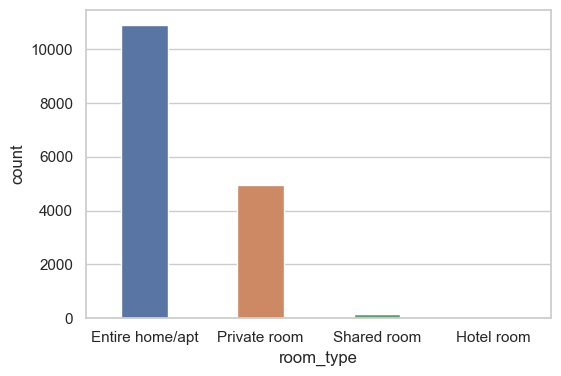

In [10]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x='room_type', data = df, width = 0.4)

##### About 68.1% of the listing is entire home/ apartment type.

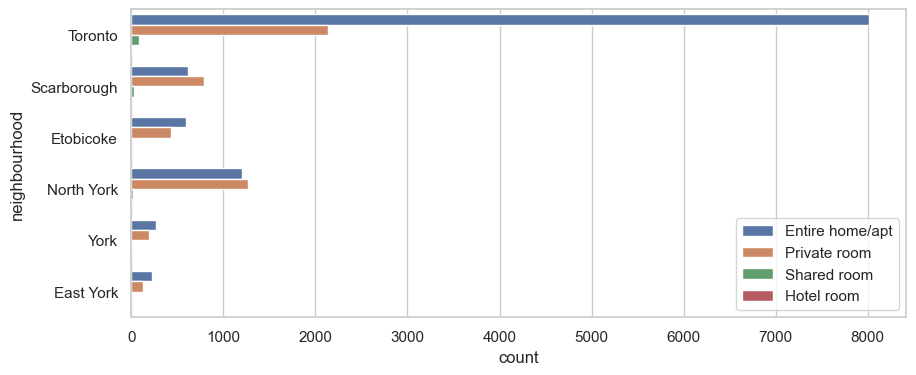

In [11]:
plt.figure(figsize=(10,4))
sns.countplot(y= 'neighbourhood', hue= 'room_type', data = df)
#plt.xticks(rotation = 'vertical')
plt.legend(loc='lower right')
plt.show()

## Average price per room type

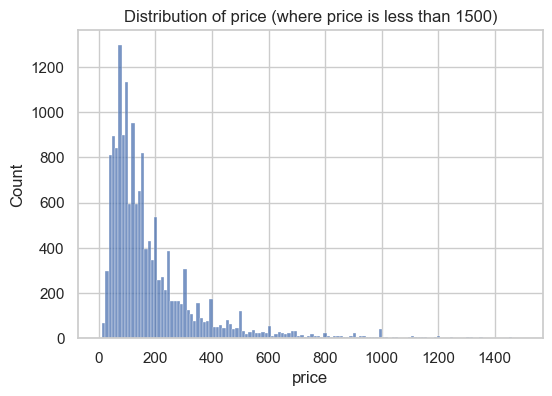

In [12]:
#distribution of price less than 1500

plt.figure(figsize= (6,4))
sns.histplot(df[df.price < 1500].price)
plt.title('Distribution of price (where price is less than 1500)')
plt.show()

Price of the most listing is less than $200

Average price per room type:


room_type
Entire home/apt    247.979031
Private room       114.534462
Shared room         95.391892
Hotel room          72.250000
Name: price, dtype: float64

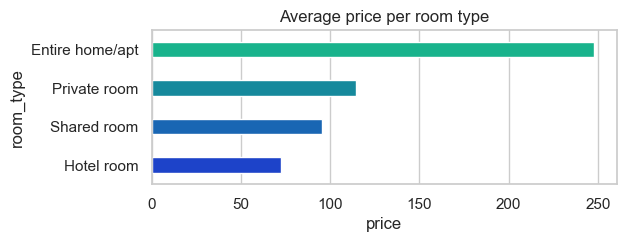

In [13]:
print('Average price per room type:')
display(df.groupby('room_type')['price'].mean().sort_values(ascending = False))
plt.figure(figsize=(6,2))
sns.barplot(y= 'room_type',x= 'price', data = df, palette='winter_r', width = 0.4, errorbar= None)
plt.title('Average price per room type')
plt.show()

 ###### Most expensive listings are entire home/apt.
 
 
 

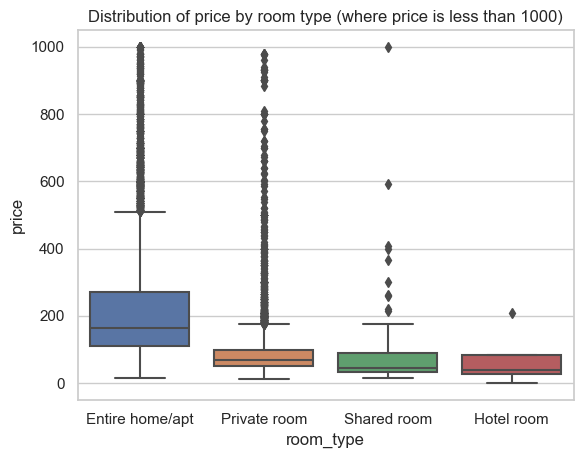

In [14]:
# Distribution of price by room type (where price is less than 1000)

sns.boxplot(data=df[df.price < 1000], x='room_type', y='price')
plt.title('Distribution of price by room type (where price is less than 1000)')
plt.show()

### Neighbourhood

##### How many Airbnb listings does each neighborhood posses?

In [15]:
list(df.neighbourhood.unique())

['Toronto', 'Scarborough', 'Etobicoke', 'North York', 'York', 'East York']

In [16]:
df1 = pd.DataFrame(data = df['neighbourhood'].value_counts())
df1.columns = ['total_count']
df1['percentage (%)'] = round(df['neighbourhood'].value_counts(normalize= True) * 100, 1)
df1

,total_count,percentage (%)
Toronto,10238,63.8
North York,2502,15.6
Scarborough,1442,9.0
Etobicoke,1029,6.4
York,466,2.9
East York,358,2.2


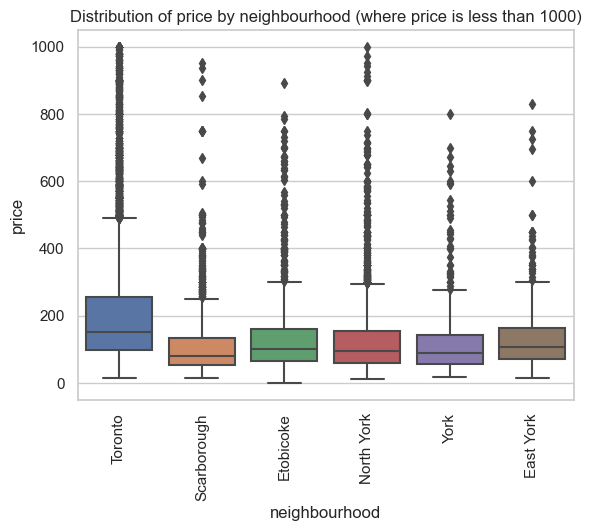

In [17]:
# Distribution of price by neighbourhood (where price is less than 1000)
sns.boxplot(data=df[df.price < 1000], x='neighbourhood', y='price')
plt.title('Distribution of price by neighbourhood (where price is less than 1000)')
plt.xticks(rotation = 'vertical')
plt.show()

In [18]:
df.groupby('neighbourhood')['price'].mean().sort_values(ascending = False)

neighbourhood
Toronto        242.406915
North York     149.598721
Etobicoke      148.905734
East York      148.773743
York           133.319742
Scarborough    115.281553
Name: price, dtype: float64

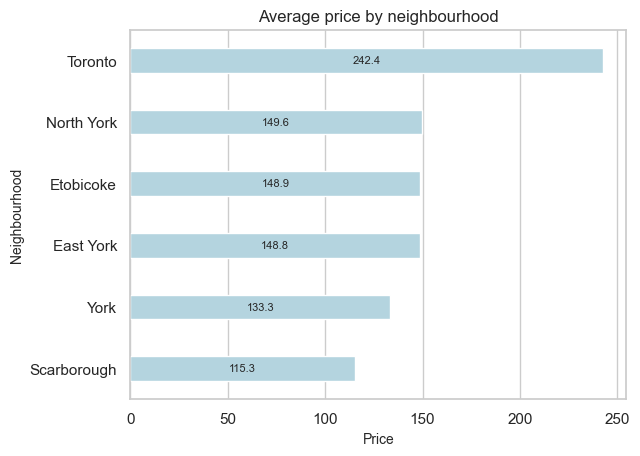

In [19]:
# Average price by neighbourhood
order =  df.groupby('neighbourhood')['price'].mean().sort_values(ascending = False).index
splot = sns.barplot(y= 'neighbourhood', x= 'price',data= df,  
              order =  order,width = 0.4, color = 'lightblue',     errorbar = None)
# splot=sns.barplot(x='neighbourhood',y='price',data=df, hue = 'room_type')
plt.ylabel("Neighbourhood", size=10)
plt.xlabel("Price", size=10)
# plt.xticks(rotation = 'vertical')
for bars in splot.containers:
        splot.bar_label(bars, fmt='%.1f',label_type='center', size= 8)
plt.title('Average price by neighbourhood')
plt.show()

##  Get the average of prices per neighbourhood and room type

In [20]:
df.groupby(['neighbourhood','room_type'])['price'].mean()

neighbourhood  room_type      
East York      Entire home/apt    187.486364
               Private room        88.598485
               Shared room         53.166667
Etobicoke      Entire home/apt    201.942470
               Hotel room           0.000000
               Private room        77.641379
               Shared room         51.000000
North York     Entire home/apt    223.432477
               Private room        80.949686
               Shared room         71.521739
Scarborough    Entire home/apt    170.842788
               Private room        74.640252
               Shared room         49.566667
Toronto        Entire home/apt    265.092814
               Hotel room          96.333333
               Private room       161.841121
               Shared room        128.468354
York           Entire home/apt    175.951852
               Private room        75.553191
               Shared room         52.000000
Name: price, dtype: float64

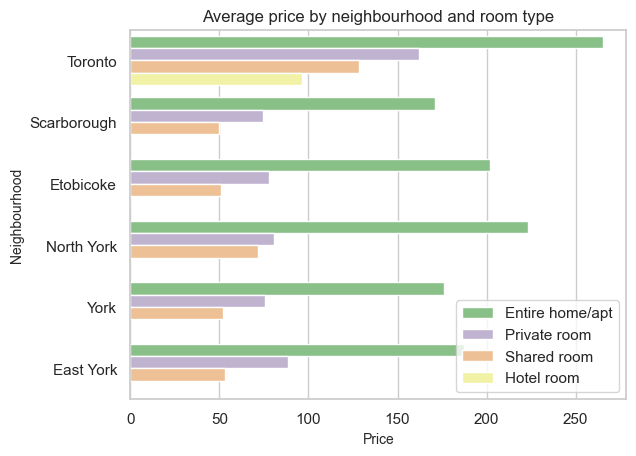

In [22]:
# Average price by neighbourhood and room type

splot = sns.barplot(y= 'neighbourhood', x= 'price',data= df, hue = 'room_type', palette='Accent', errorbar = None)
# splot=sns.barplot(x='neighbourhood',y='price',data=df, hue = 'room_type')
plt.title('Average price by neighbourhood and room type')
plt.xlabel("Price", size=10)
plt.ylabel("Neighbourhood", size=10)
# plt.xticks(rotation = 'vertical')
plt.legend(loc = 'lower right')
plt.show()

## Top hosts

In [23]:
top_sorted = df.sort_values(by='host_listings_count', 
                     ascending = True, axis = 0)[['host_name', 'host_listings_count']].set_index('host_name')
top_sorted.drop_duplicates(inplace= True)
top_sorted = top_sorted.tail(10)

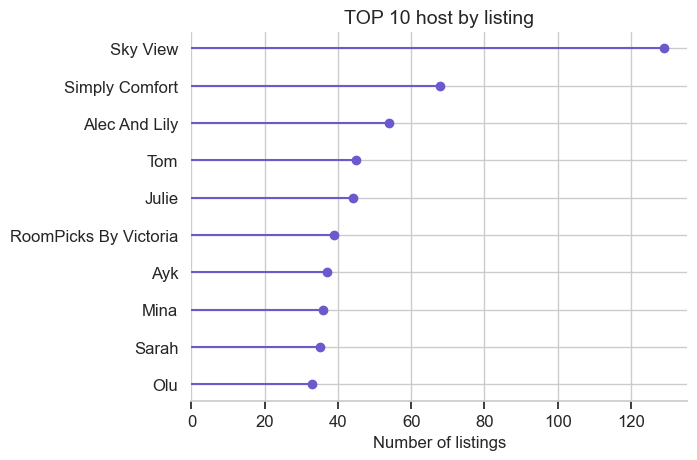

In [24]:
plt.hlines(y=top_sorted.index, xmin=0, xmax=top_sorted,
           color='slateblue')
plt.plot(top_sorted, top_sorted.index,
         'o', color='slateblue')
plt.title('TOP 10 host by listing', fontsize=14)
plt.xlabel('Number of listings', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(0, None)
plt.ylabel(None)
plt.yticks(fontsize=12)
sns.despine(left=True)
plt.grid(True)
plt.tick_params(bottom=True, left=False)
plt.show()

## License

In [26]:
df1 = pd.DataFrame(data = df['license'].value_counts())
df1.columns = ['total_count']
df1['percentage (%)'] = round(df['license'].value_counts(normalize= True) * 100, 1)
df1

,total_count,percentage (%)
Unlicensed,9547,59.5
Licensed,6254,39.0
Exempt,234,1.5


Text(0.5, 1.0, 'The condition of license')

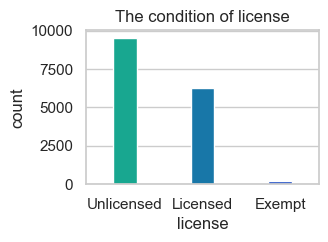

In [27]:
plt.figure(figsize= (3,2))
ax = sns.countplot(x= 'license', data = df, palette='winter_r', width=0.3)
plt.title('The condition of license')

## Short-term or long-term rental

A short-term rental is considered if it is rented out for less than 28 consecutive days in exchange for payment. This includes bed and breakfasts (B&Bs) but excludes hotels and motels.

#####  Explore and analyze the data set to identify short-term rentals.

In [28]:
df['rental_type'] = np.where((df.minimum_nights < 28) & (df.room_type != 'Hotel room'), 'Short-term','Long-term')
df1 = pd.DataFrame(data = df['rental_type'].value_counts())
df1.columns = ['total_count']
df1['percentage (%)'] = round(df['rental_type'].value_counts(normalize= True) * 100, 1)
df1

,total_count,percentage (%)
Long-term,11096,69.2
Short-term,4939,30.8


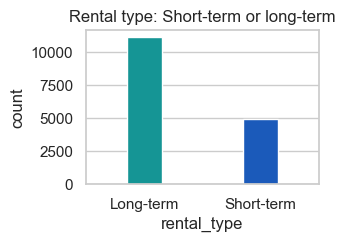

In [29]:
plt.figure(figsize= (3,2))
ax = sns.countplot(x= 'rental_type', data =df, palette='winter_r', width=.3)
plt.title('Rental type: Short-term or long-term')
plt.show()

<AxesSubplot: >

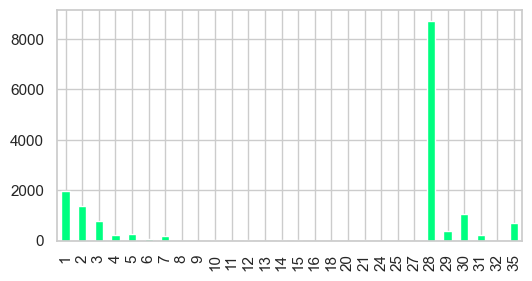

In [30]:
df['Min_night_new'] = np.where(df.minimum_nights >=35, 35, df.minimum_nights)
plt.figure(figsize= (6,3))
df['Min_night_new'].value_counts().sort_index().plot(kind= 'bar', cmap='winter_r')

##### Most of the nights stayed are mostly 28 days

<Figure size 600x400 with 0 Axes>

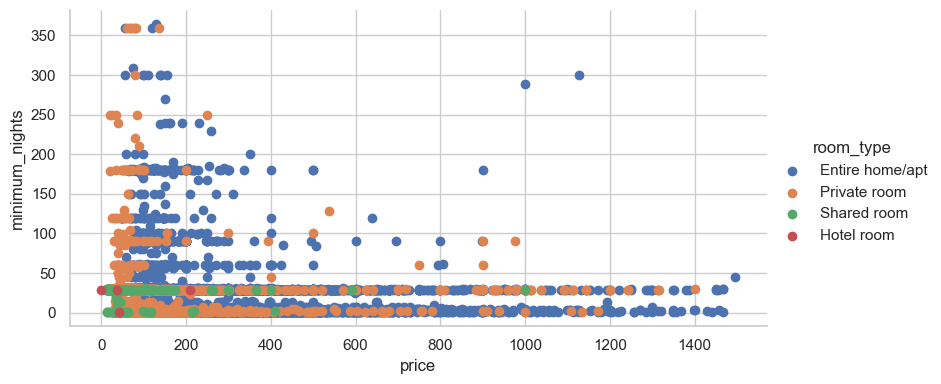

In [31]:
plt.figure(figsize=(6,4))
sns.FacetGrid(df[(df.price < 1500) & (df.minimum_nights < 365)],hue='room_type', height = 4, aspect = 2).map(plt.scatter,'price','minimum_nights').add_legend()
plt.show()

### Listing per host

In [32]:
df['listing_type'] = np.where(df['host_listings_count'] == 1, 'single_listing', 'multi-listing')
df1 = pd.DataFrame(data = df['listing_type'].value_counts())
df1.columns = ['total_count']
df1['percentage (%)'] = round(df['listing_type'].value_counts(normalize= True) * 100, 1)
df1

,total_count,percentage (%)
single_listing,8322,51.9
multi-listing,7713,48.1


<AxesSubplot: >

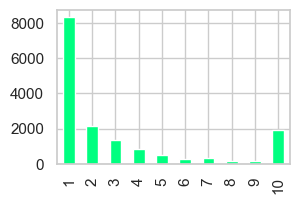

In [33]:
plt.figure(figsize= (3,2))
pd.Series(np.where(df.host_listings_count >= 10, 10, 
                   df.host_listings_count)).value_counts().sort_index().plot(kind='bar', cmap='winter_r')

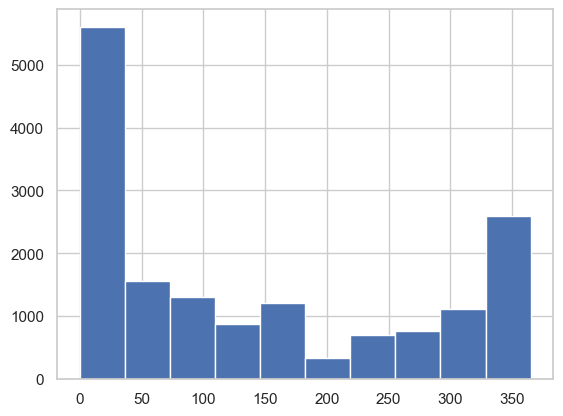

In [34]:
# Histograms for univariate Analysis
plt.hist(df['availability_365'])
plt.show()

### Number of reviews

In [35]:
df['number_of_reviews'].value_counts()

0      3395
1      1519
2       984
3       762
4       582
       ... 
381       1
326       1
466       1
389       1
262       1
Name: number_of_reviews, Length: 378, dtype: int64

<AxesSubplot: xlabel='number_of_reviews', ylabel='Count'>

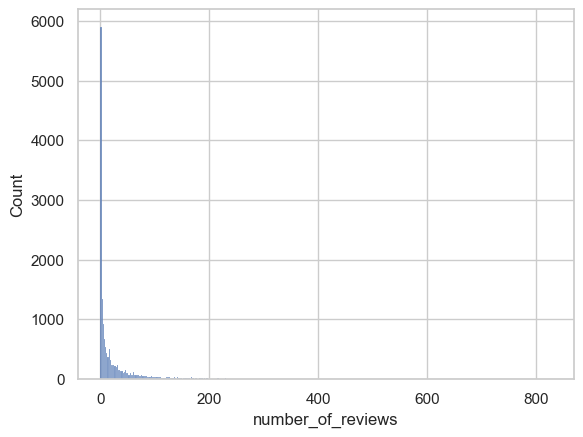

In [36]:
sns.histplot(x= 'number_of_reviews', data = df)

<AxesSubplot: xlabel='number_of_reviews', ylabel='Count'>

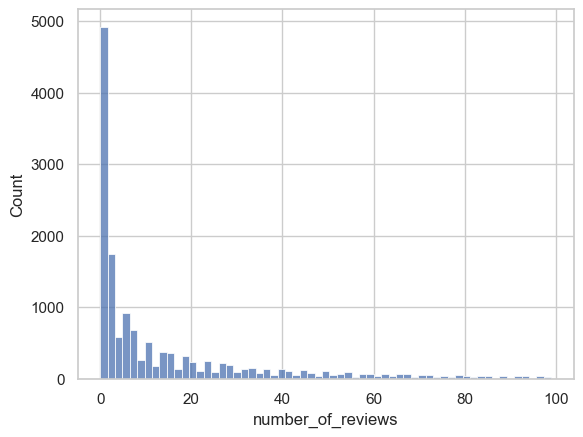

In [37]:
sns.histplot(x='number_of_reviews', data =  df[df['number_of_reviews'] < 100])